In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sys
from pandas.tools.plotting import scatter_matrix
from matplotlib.pyplot import figure 
from sklearn import cluster
from sklearn import metrics
from sklearn.preprocessing import scale
pd.set_option('display.precision',3)
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 300
pd.options.display.float_format = '{:20,.2f}'.format

In [166]:
co=pd.read_csv('//Users//back//Desktop//Big Data Project//CO2(1).csv')

In [167]:
sys.version

'3.7.0 (default, Jun 28 2018, 07:39:16) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [168]:
co

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,nan,nan,nan,nan,nan,nan,...,"2,658.57","2,629.24","2,508.23","2,500.89","1,349.46",861.75,872.75,nan,nan,nan
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.37,491.38,689.40,707.73,839.74,"1,008.42",...,"4,206.05","6,769.28","8,463.44","12,240.45","10,755.31","10,014.58","9,809.23",nan,nan,nan
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.05,454.71,"1,180.77","1,151.44","1,224.78","1,188.11",...,"25,709.34","27,792.19","29,057.31","30,340.76","33,399.04","32,617.97","34,763.16",nan,nan,nan
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,"2,024.18","2,280.87","2,464.22","2,082.86","2,016.85","2,174.53",...,"4,374.73","4,378.40","4,598.42","5,240.14","4,910.11","5,064.13","5,716.85",nan,nan,nan
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,nan,nan,nan,nan,nan,nan,...,539.05,517.05,517.05,491.38,487.71,476.71,462.04,nan,nan,nan
5,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,"59,535.40","65,119.82","74,322.01","87,853.79","103,146.74","123,768.76",...,"1,491,970.29","1,581,327.74","1,645,558.92","1,655,808.18","1,796,962.01","1,775,095.69","1,895,700.32",nan,nan,nan
6,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,11.00,11.00,18.34,22.00,18.34,22.00,...,"157,354.64","167,959.60","160,812.62","165,440.37","176,386.37","170,706.18","211,369.55",nan,nan,nan
7,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,"48,815.10","51,180.32","53,695.88","50,083.89","55,727.40","58,866.35",...,"189,107.19","179,961.69","187,919.08","191,633.75","192,356.15","189,851.59","204,024.55",nan,nan,nan
8,Armenia,ARM,CO2 emissions (kt),EN.ATM.CO2E.KT,nan,nan,nan,nan,nan,nan,...,"5,559.17","4,360.06","4,217.05","4,917.45","5,694.85","5,496.83","5,529.84",nan,nan,nan
9,American Samoa,ASM,CO2 emissions (kt),EN.ATM.CO2E.KT,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [169]:
co.shape

(264, 62)

In [170]:
co.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
Country Name      264 non-null object
Country Code      264 non-null object
Indicator Name    264 non-null object
Indicator Code    264 non-null object
1960              192 non-null float64
1961              193 non-null float64
1962              195 non-null float64
1963              196 non-null float64
1964              203 non-null float64
1965              203 non-null float64
1966              203 non-null float64
1967              203 non-null float64
1968              203 non-null float64
1969              203 non-null float64
1970              205 non-null float64
1971              206 non-null float64
1972              208 non-null float64
1973              208 non-null float64
1974              208 non-null float64
1975              208 non-null float64
1976              208 non-null float64
1977              208 non-null float64
1978              208 non-null float64
19

In [171]:
co_null=co.isnull().sum() #checking the rows with max NAN values
co_null=co_null.reset_index(name='val')
co_null

,index,val
0,Country Name,0
1,Country Code,0
2,Indicator Name,0
3,Indicator Code,0
4,1960,72
5,1961,71
6,1962,69
7,1963,68
8,1964,61
9,1965,61


In [172]:
co.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

In [173]:
co2=co.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991','1992', '1993', '1994', '1995', '1996',
        '1997', '1998', '1999','2013','2014','2015', '2016', '2017'],axis=1) #Dropping the columns of CO2 that are not required

In [174]:
co2

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,"2,379.88","2,409.22","2,438.55","2,563.23","2,618.24","2,720.91","2,717.25","2,823.59","2,658.57","2,629.24","2,508.23","2,500.89","1,349.46"
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,773.74,817.74,"1,070.76","1,195.44",949.75,"1,327.45","1,650.15","2,273.54","4,206.05","6,769.28","8,463.44","12,240.45","10,755.31"
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,"9,541.53","9,732.22","12,665.82","9,064.82","18,793.38","19,156.41","22,266.02","25,151.95","25,709.34","27,792.19","29,057.31","30,340.76","33,399.04"
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,021.61","3,223.29","3,751.34","4,294.06","4,165.71","4,253.72","3,898.02","3,927.36","4,374.73","4,378.40","4,598.42","5,240.14","4,910.11"
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,524.38,524.38,531.72,535.38,561.05,575.72,546.38,539.05,539.05,517.05,517.05,491.38,487.71
5,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,"1,045,762.39","1,040,650.60","1,062,153.88","1,143,168.92","1,252,559.19","1,318,345.17","1,381,941.95","1,359,855.61","1,491,970.29","1,581,327.74","1,645,558.92","1,655,808.18","1,796,962.01"
6,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,"112,562.23","101,414.55","84,704.03","106,841.71","113,240.63","116,148.56","123,874.93","135,627.66","157,354.64","167,959.60","160,812.62","165,440.37","176,386.37"
7,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,"142,136.59","133,720.82","124,714.67","135,062.94","157,589.33","162,110.74","175,436.61","175,176.26","189,107.19","179,961.69","187,919.08","191,633.75","192,356.15"
8,Armenia,ARM,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,465.32","3,542.32","3,043.61","3,428.64","3,645.00","4,352.73","4,382.06","5,064.13","5,559.17","4,360.06","4,217.05","4,917.45","5,694.85"
9,American Samoa,ASM,CO2 emissions (kt),EN.ATM.CO2E.KT,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [175]:
co2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')

In [176]:
co_null_=co2.isnull().T.sum() #checking the rows with max NAN values
co_null_=co_null_.reset_index(name='val')
co_null_

,index,val
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,13


In [177]:
co_null_.loc[co_null_['val']>0] #Getting only the columns wiht null values

,index,val
9,9,13
36,36,13
49,49,12
91,91,13
106,106,13
108,108,13
135,135,7
145,145,13
147,147,13
160,160,5


In [178]:
co3=co2.drop([9,36,49,91,106,108,135,145,147,160,162,190,210,212,214,223,235,254,259]) #Dropping the null rows 

In [179]:
co3= co3.reset_index(drop=True)
co3.head(260)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,"2,379.88","2,409.22","2,438.55","2,563.23","2,618.24","2,720.91","2,717.25","2,823.59","2,658.57","2,629.24","2,508.23","2,500.89","1,349.46"
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,773.74,817.74,"1,070.76","1,195.44",949.75,"1,327.45","1,650.15","2,273.54","4,206.05","6,769.28","8,463.44","12,240.45","10,755.31"
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,"9,541.53","9,732.22","12,665.82","9,064.82","18,793.38","19,156.41","22,266.02","25,151.95","25,709.34","27,792.19","29,057.31","30,340.76","33,399.04"
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,021.61","3,223.29","3,751.34","4,294.06","4,165.71","4,253.72","3,898.02","3,927.36","4,374.73","4,378.40","4,598.42","5,240.14","4,910.11"
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,524.38,524.38,531.72,535.38,561.05,575.72,546.38,539.05,539.05,517.05,517.05,491.38,487.71
5,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,"1,045,762.39","1,040,650.60","1,062,153.88","1,143,168.92","1,252,559.19","1,318,345.17","1,381,941.95","1,359,855.61","1,491,970.29","1,581,327.74","1,645,558.92","1,655,808.18","1,796,962.01"
6,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,"112,562.23","101,414.55","84,704.03","106,841.71","113,240.63","116,148.56","123,874.93","135,627.66","157,354.64","167,959.60","160,812.62","165,440.37","176,386.37"
7,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,"142,136.59","133,720.82","124,714.67","135,062.94","157,589.33","162,110.74","175,436.61","175,176.26","189,107.19","179,961.69","187,919.08","191,633.75","192,356.15"
8,Armenia,ARM,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,465.32","3,542.32","3,043.61","3,428.64","3,645.00","4,352.73","4,382.06","5,064.13","5,559.17","4,360.06","4,217.05","4,917.45","5,694.85"
9,Antigua and Barbuda,ATG,CO2 emissions (kt),EN.ATM.CO2E.KT,344.70,348.37,370.37,403.37,421.70,429.04,443.71,469.38,480.38,509.71,524.38,513.38,524.38


In [180]:
co3.shape

(245, 17)

In [181]:
co3.isnull().T.any() #To check for any missing values for imputation

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [182]:
df=co3.sort_values('2000', ascending=False) #Finding the exact rows required for calculation of regions
df

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
239,World,WLD,CO2 emissions (kt),EN.ATM.CO2E.KT,"24,689,911.00","25,276,631.00","25,646,998.00","27,047,792.00","28,393,581.00","29,490,014.00","30,568,112.00","31,180,501.00","32,181,592.00","31,891,899.00","33,472,376.00","34,847,501.00","35,470,891.00"
89,High income,HIC,CO2 emissions (kt),EN.ATM.CO2E.KT,"13,307,528.30","13,261,794.97","13,336,269.19","13,544,231.82","13,794,815.20","13,816,625.35","13,852,212.46","13,928,700.49","13,772,700.73","13,051,190.40","13,509,175.77","13,285,754.11","13,158,223.18"
168,OECD members,OED,CO2 emissions (kt),EN.ATM.CO2E.KT,"12,810,349.14","12,760,004.90","12,825,006.14","13,024,846.64","13,171,497.30","13,190,840.73","13,170,906.91","13,281,309.28","13,047,992.74","12,257,427.88","12,638,033.14","12,458,577.50","12,271,457.82"
184,Post-demographic dividend,PST,CO2 emissions (kt),EN.ATM.CO2E.KT,"12,261,234.22","12,212,536.46","12,271,505.49","12,445,856.67","12,572,896.22","12,556,600.07","12,473,157.49","12,543,615.23","12,306,752.69","11,529,488.04","11,921,270.32","11,678,320.57","11,474,043.00"
97,IDA & IBRD total,IBT,CO2 emissions (kt),EN.ATM.CO2E.KT,"11,049,625.11","11,279,397.14","11,727,213.35","12,812,844.56","13,810,068.84","14,707,003.84","15,676,787.45","16,454,110.75","17,464,977.12","17,847,871.21","18,984,137.53","20,490,771.88","21,209,667.20"
131,Low & middle income,LMY,CO2 emissions (kt),EN.ATM.CO2E.KT,"10,590,265.15","10,829,865.60","11,287,205.29","12,350,591.36","13,318,999.94","14,210,397.96","15,143,713.22","15,902,799.20","16,909,118.38","17,322,558.67","18,430,142.17","19,903,961.89","20,640,959.83"
96,IBRD only,IBD,CO2 emissions (kt),EN.ATM.CO2E.KT,"10,510,284.27","10,720,015.06","11,154,045.17","12,204,318.67","13,173,559.82","14,066,019.91","15,013,501.07","15,751,822.19","16,749,154.51","17,161,750.68","18,258,304.70","19,728,658.02","20,440,144.03"
145,Middle income,MIC,CO2 emissions (kt),EN.ATM.CO2E.KT,"10,400,047.07","10,636,405.92","11,106,833.30","12,148,943.74","13,115,633.28","13,998,889.62","14,924,184.44","15,679,070.18","16,673,026.85","17,088,221.52","18,189,470.87","19,677,764.73","20,425,563.41"
230,Upper middle income,UMC,CO2 emissions (kt),EN.ATM.CO2E.KT,"8,001,478.98","8,184,906.01","8,592,800.44","9,503,852.70","10,340,543.05","11,130,780.70","11,946,274.41","12,528,113.57","13,290,426.38","13,563,122.57","14,601,050.55","15,747,530.41","16,248,034.49"
133,Late-demographic dividend,LTE,CO2 emissions (kt),EN.ATM.CO2E.KT,"6,962,177.35","7,115,864.92","7,484,431.85","8,337,050.12","9,142,115.55","9,903,661.62","10,691,241.41","11,267,320.57","11,958,612.61","12,211,433.40","13,264,209.87","14,391,661.02","14,812,781.93"


In [183]:
md= pd.read_csv('//Users/back//Desktop//Big Data Project//Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_10134360.csv')
md #Importing the meteadata dataframe to analyse the countries belonging to the different regions

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra
5,ARB,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World
6,ARE,Middle East & North Africa,High income,NaN,United Arab Emirates
7,ARG,Latin America & Caribbean,High income,National Institute of Statistics and Census re...,Argentina
8,ARM,Europe & Central Asia,Upper middle income,NaN,Armenia
9,ASM,East Asia & Pacific,Upper middle income,New base Year 2009,American Samoa


In [184]:
md2= md.sort_values("IncomeGroup")
#sorting the countries and the regions according to IncomeGroup in order to see the catagories of the differnt income type countries
md2

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba
169,NCL,East Asia & Pacific,High income,NaN,New Caledonia
79,GBR,Europe & Central Asia,High income,NaN,United Kingdom
173,NLD,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Netherlands
76,FRO,Europe & Central Asia,High income,NaN,Faroe Islands
75,FRA,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,France
174,NOR,Europe & Central Asia,High income,NaN,Norway
73,FIN,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Finland
69,EST,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Estonia
68,ESP,Europe & Central Asia,High income,A simple multiplier is used to convert the nat...,Spain


In [185]:
md3= md2.sort_values("Region") 
#Sorting the metadata df according to the diffenent regions to see which all countries are grouped under certain regions.
md3



,Country Code,Region,IncomeGroup,SpecialNotes,TableName
205,SGP,East Asia & Pacific,High income,Fiscal year end: March 31; reporting period fo...,Singapore
123,KOR,East Asia & Pacific,High income,The new base year is 2010. GDP data are availa...,"Korea, Rep."
184,PHL,East Asia & Pacific,Lower middle income,NaN,Philippines
29,BRN,East Asia & Pacific,High income,National accounts revision is based on data fr...,Brunei Darussalam
152,MHL,East Asia & Pacific,Upper middle income,Fiscal year ends on September 30; reporting pe...,Marshall Islands
230,THA,East Asia & Pacific,Upper middle income,Fiscal year end: September 30; reporting perio...,Thailand
236,TON,East Asia & Pacific,Upper middle income,NaN,Tonga
206,SLB,East Asia & Pacific,Lower middle income,NaN,Solomon Islands
143,MAC,East Asia & Pacific,High income,On 20 December 1999 China resumed its exercise...,"Macao SAR, China"
94,HKG,East Asia & Pacific,High income,On 1 July 1997 China resumed its exercise of s...,"Hong Kong SAR, China"


In [186]:
 # Choose the code for the specific region to display the countries listed under it.
sor1= md3.loc[md3['Region'] == "East Asia & Pacific"]
sor2= md3.loc[md3['Region'] == "Europe & Central Asia"]
sor3= md3.loc[md3['Region'] == "Latin America & Caribbean"]
sor4= md3.loc[md3['Region'] == "Middle East & North Africa"] 
sor5= md3.loc[md3['Region'] == "North America"]                  
sor6= md3.loc[md3['Region'] == "South Asia"]
sor7=  md3.loc[md3['Region'] == "Sub-Saharan Africa"]
sor7.sort_values('TableName')

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
16,BEN,Sub-Saharan Africa,Low income,NaN,Benin
31,BWA,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,Botswana
17,BFA,Sub-Saharan Africa,Low income,NaN,Burkina Faso
14,BDI,Sub-Saharan Africa,Low income,NaN,Burundi
45,CPV,Sub-Saharan Africa,Lower middle income,Cabo Verde is the name for the country previou...,Cabo Verde
40,CMR,Sub-Saharan Africa,Lower middle income,National accounts data revised from 1993-2016.,Cameroon
32,CAF,Sub-Saharan Africa,Low income,The source of national accounts has changed to...,Central African Republic
226,TCD,Sub-Saharan Africa,Low income,NaN,Chad
44,COM,Sub-Saharan Africa,Low income,NaN,Comoros


In [187]:
#Doing for Sub_Saharan Africa region
ssa_1=sor7.TableName.values #Getting values
ssa_2=co3[co3['Country Name'].isin(ssa_1)] 
ssa_2i=ssa_2.index
#Getting the row index values of co3 which matches country name from List.

In [188]:
ssa_2.sort_values(by='2012',ascending=False).head() #Getting the top emission country per region for graph later 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
242,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,"378,665.42","372,042.82","356,637.75","404,459.10","450,186.59","416,915.90","447,894.71","466,578.08","496,772.16","503,112.40","474,099.10","470,582.44","468,770.95"
161,Nigeria,NGA,CO2 emissions (kt),EN.ATM.CO2E.KT,"76,057.25","85,734.46","93,677.18","101,616.24","104,304.15","106,067.98","98,891.66","95,055.97","96,148.74","76,735.64","91,517.32","95,694.03","98,502.95"
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,"9,541.53","9,732.22","12,665.82","9,064.82","18,793.38","19,156.41","22,266.02","25,151.95","25,709.34","27,792.19","29,057.31","30,340.76","33,399.04"
192,Sudan,SDN,CO2 emissions (kt),EN.ATM.CO2E.KT,"5,533.50","6,369.58","8,118.74","9,072.16","11,463.04","10,982.67","12,013.09","14,125.28","14,913.69","15,562.75","15,940.45","15,658.09","14,642.33"
113,Kenya,KEN,CO2 emissions (kt),EN.ATM.CO2E.KT,"10,417.95","9,369.18","7,968.39","6,754.61","7,623.69","8,562.44","9,574.54","9,831.23","10,241.93","12,350.46","12,174.44","13,457.89","12,515.47"


In [189]:
#Doing for South Asia region
sa_1=sor6.TableName.values  
sa_2=co3[co3['Country Name'].isin(sa_1)] #co
sa_2i= sa_2.index
#Getting the row index values of co3 which matches country name from List.

In [190]:
sa_2.sort_values(by='2012',ascending=False).head() #Getting the top emission country per region for graph later 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
102,India,IND,CO2 emissions (kt),EN.ATM.CO2E.KT,"1,031,853.46","1,041,152.97","1,054,258.83","1,099,597.62","1,154,320.26","1,222,563.13","1,303,717.51","1,407,607.29","1,568,379.57","1,738,645.71","1,719,690.99","1,841,776.42","2,018,503.82"
171,Pakistan,PAK,CO2 emissions (kt),EN.ATM.CO2E.KT,"106,449.34","108,282.84","114,084.04","118,895.14","131,601.30","136,636.09","146,074.95","158,894.78","159,070.79","158,836.11","161,395.67","161,956.72","163,496.86"
17,Bangladesh,BGD,CO2 emissions (kt),EN.ATM.CO2E.KT,"27,869.20","32,456.62","33,707.06","35,672.58","37,704.09","39,478.92","43,541.96","44,381.70","49,511.83","53,736.22","59,937.11","63,413.43","67,505.80"
129,Sri Lanka,LKA,CO2 emissions (kt),EN.ATM.CO2E.KT,"10,238.26","10,443.62","11,056.00","11,078.01","12,299.12","12,101.10","11,976.42","12,354.12","12,207.44","13,175.53","13,263.54","15,137.38","16,032.12"
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,773.74,817.74,"1,070.76","1,195.44",949.75,"1,327.45","1,650.15","2,273.54","4,206.05","6,769.28","8,463.44","12,240.45","10,755.31"


In [191]:
#Doing for North America region
na_1=sor5.TableName.values
na_2=co3[co3['Country Name'].isin(na_1)] #Getting the row index values of co3 which matches country name from List
na_2i= na_2.index

In [192]:
na_2.sort_values(by='2012',ascending=False).head() #Getting the top emission country per region for graph later 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
232,United States,USA,CO2 emissions (kt),EN.ATM.CO2E.KT,"5,693,684.89","5,595,794.33","5,641,309.13","5,675,701.93","5,756,075.23","5,789,727.29","5,697,285.89","5,789,030.56","5,614,110.99","5,263,505.46","5,395,532.12","5,289,680.50","5,119,436.36"
32,Canada,CAN,CO2 emissions (kt),EN.ATM.CO2E.KT,"534,380.91","527,926.99","519,335.21","553,100.94","552,198.86","557,417.00","543,819.77","554,355.06","561,029.00","536,764.46","534,670.60","537,112.82","517,457.70"
24,Bermuda,BMU,CO2 emissions (kt),EN.ATM.CO2E.KT,517.05,528.05,557.38,561.05,583.05,583.05,652.73,729.73,649.06,476.71,608.72,443.71,476.71


In [193]:
#Doing for Middle East & North Africa region
mea_1=sor4.TableName.values
mea_2=co3[co3['Country Name'].isin(mea_1)] #Getting the row index values of co3 which matches country name from List
mea_2i= mea_2.index

In [194]:
mea_2.sort_values(by='2012',ascending=False).head() #Getting the top emission country per region for graph later 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
104,"Iran, Islamic Rep.",IRN,CO2 emissions (kt),EN.ATM.CO2E.KT,"372,237.17","398,437.89","401,760.19","418,437.70","447,036.64","468,807.61","509,338.97","519,324.21","541,582.90","554,278.05","573,031.09","589,055.88","611,758.28"
191,Saudi Arabia,SAU,CO2 emissions (kt),EN.ATM.CO2E.KT,"296,935.33","297,214.02","326,407.00","327,272.42","395,834.32","397,642.15","432,739.00","387,777.92","430,175.77","468,965.30","518,491.80","499,878.11","564,842.68"
62,"Egypt, Arab Rep.",EGY,CO2 emissions (kt),EN.ATM.CO2E.KT,"141,326.18","125,451.74","127,193.56","147,963.45","150,911.72","167,207.87","178,586.57","189,092.52","198,586.39","206,734.46","202,715.43","217,163.41","217,068.07"
6,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,"112,562.23","101,414.55","84,704.03","106,841.71","113,240.63","116,148.56","123,874.93","135,627.66","157,354.64","167,959.60","160,812.62","165,440.37","176,386.37"
105,Iraq,IRQ,CO2 emissions (kt),EN.ATM.CO2E.KT,"72,445.25","85,342.09","87,259.93","91,117.62","114,084.04","113,522.99","98,770.65","62,155.65","93,149.13","104,546.17","112,195.53","134,384.55","152,723.22"


In [195]:
#Doing for Latin America & Caribbean region
la_2=sor3.TableName.values
la_3=co3[co3['Country Name'].isin(la_2)] #Getting the row index values of co3 which matches country name from List
la_3i= la_3.index

In [196]:
la_3.sort_values(by='2012',ascending=False).head() #Getting the top emission country per region for graph later 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
143,Mexico,MEX,CO2 emissions (kt),EN.ATM.CO2E.KT,"398,382.88","412,977.54","414,389.34","440,208.68","441,308.78","466,361.73","479,251.23","480,520.01","493,251.84","475,950.93","464,308.21","484,429.03","496,324.78"
26,Brazil,BRA,CO2 emissions (kt),EN.ATM.CO2E.KT,"327,983.81","337,433.67","332,266.87","321,621.57","337,826.04","347,308.90","347,668.27","363,212.68","387,631.24","367,147.37","419,754.16","439,412.94","470,028.73"
235,"Venezuela, RB",VEN,CO2 emissions (kt),EN.ATM.CO2E.KT,"152,422.52","172,587.36","193,316.91","192,103.13","151,733.13","165,095.67","169,514.41","160,786.95","179,114.61","179,789.34","189,070.52","176,822.74","198,766.07"
7,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,"142,136.59","133,720.82","124,714.67","135,062.94","157,589.33","162,110.74","175,436.61","175,176.26","189,107.19","179,961.69","187,919.08","191,633.75","192,356.15"
35,Chile,CHL,CO2 emissions (kt),EN.ATM.CO2E.KT,"58,815.01","53,340.18","55,162.68","55,602.72","59,775.77","61,818.29","64,814.22","71,638.51","71,851.20","66,805.41","72,250.90","79,243.87","80,974.69"


In [197]:
#Doing for Europe & Central Asia region
eca_2=sor2.TableName.values
eca_3=co3[co3['Country Name'].isin(eca_2)] #Getting the row index values of co3 which matches country name from List
eca_3i= eca_3.index

In [198]:
eca_3.sort_values(by='2012',ascending=False).head() #Getting the top emission country per region for graph later 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
188,Russian Federation,RUS,CO2 emissions (kt),EN.ATM.CO2E.KT,"1,557,899.28","1,557,506.91","1,557,085.21","1,604,242.83","1,602,115.97","1,615,089.81","1,669,262.40","1,666,886.19","1,714,978.89","1,574,045.08","1,670,531.19","1,763,405.29","1,830,830.42"
50,Germany,DEU,CO2 emissions (kt),EN.ATM.CO2E.KT,"829,977.78","853,662.93","829,724.76","822,812.46","816,802.25","797,180.13","816,472.22","780,546.62","780,564.95","722,263.32","758,859.98","732,497.92","739,861.25"
76,United Kingdom,GBR,CO2 emissions (kt),EN.ATM.CO2E.KT,"541,784.58","545,862.29","528,642.05","540,006.09","539,239.68","542,580.32","541,458.22","528,425.70","520,688.33","471,719.21","493,207.83","447,828.71","468,572.93"
108,Italy,ITA,CO2 emissions (kt),EN.ATM.CO2E.KT,"450,564.29","450,347.94","452,610.48","468,349.24","473,970.75","473,384.03","469,346.66","462,676.39","447,186.98","401,591.51","405,361.18","397,994.18","369,468.59"
72,France,FRA,CO2 emissions (kt),EN.ATM.CO2E.KT,"362,226.26","377,535.98","375,075.43","380,689.60","383,758.88","385,368.70","375,764.82","369,142.22","366,325.97","351,899.99","353,033.09","331,804.83","333,227.62"


In [199]:
#Doing for East Asia & Pacific region
eap_2=sor1.TableName.values
eap_3=co3[co3['Country Name'].isin(eap_2)] #Getting the row index values of co3 which matches country name from List
eap_3i= eap_3.index

In [200]:
eap_3.sort_values(by='2012',ascending=False).head() #Getting the top emission country per region for graph later 

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
36,China,CHN,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,405,179.87","3,487,566.36","3,850,269.33","4,540,417.06","5,233,538.73","5,896,957.71","6,529,291.52","7,030,797.77","7,553,070.25","8,001,008.96","8,776,040.42","9,733,538.12","10,028,573.94"
111,Japan,JPN,CO2 emissions (kt),EN.ATM.CO2E.KT,"1,220,527.95","1,203,377.39","1,220,047.57","1,242,093.57","1,266,009.75","1,239,255.32","1,231,495.94","1,252,229.16","1,210,135.67","1,103,869.68","1,171,624.83","1,191,074.60","1,230,168.49"
100,Indonesia,IDN,CO2 emissions (kt),EN.ATM.CO2E.KT,"263,418.95","294,907.47","306,737.22","316,792.13","337,635.36","341,991.75","345,119.71","375,544.80","416,560.20","446,409.58","428,760.31","603,665.21","637,078.91"
118,"Korea, Rep.",KOR,CO2 emissions (kt),EN.ATM.CO2E.KT,"447,561.02","450,193.92","465,631.99","466,215.05","482,276.51","462,922.08","470,655.78","495,675.72","507,589.81","508,862.26","566,716.52","589,400.58","583,966.08"
10,Australia,AUS,CO2 emissions (kt),EN.ATM.CO2E.KT,"329,443.28","324,844.86","341,353.70","336,271.23","342,699.48","350,172.83","365,346.88","372,090.49","385,904.08","394,792.89","390,861.86","391,818.95","388,126.28"


In [201]:
co3

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,"2,379.88","2,409.22","2,438.55","2,563.23","2,618.24","2,720.91","2,717.25","2,823.59","2,658.57","2,629.24","2,508.23","2,500.89","1,349.46"
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,773.74,817.74,"1,070.76","1,195.44",949.75,"1,327.45","1,650.15","2,273.54","4,206.05","6,769.28","8,463.44","12,240.45","10,755.31"
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,"9,541.53","9,732.22","12,665.82","9,064.82","18,793.38","19,156.41","22,266.02","25,151.95","25,709.34","27,792.19","29,057.31","30,340.76","33,399.04"
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,021.61","3,223.29","3,751.34","4,294.06","4,165.71","4,253.72","3,898.02","3,927.36","4,374.73","4,378.40","4,598.42","5,240.14","4,910.11"
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,524.38,524.38,531.72,535.38,561.05,575.72,546.38,539.05,539.05,517.05,517.05,491.38,487.71
5,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,"1,045,762.39","1,040,650.60","1,062,153.88","1,143,168.92","1,252,559.19","1,318,345.17","1,381,941.95","1,359,855.61","1,491,970.29","1,581,327.74","1,645,558.92","1,655,808.18","1,796,962.01"
6,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,"112,562.23","101,414.55","84,704.03","106,841.71","113,240.63","116,148.56","123,874.93","135,627.66","157,354.64","167,959.60","160,812.62","165,440.37","176,386.37"
7,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,"142,136.59","133,720.82","124,714.67","135,062.94","157,589.33","162,110.74","175,436.61","175,176.26","189,107.19","179,961.69","187,919.08","191,633.75","192,356.15"
8,Armenia,ARM,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,465.32","3,542.32","3,043.61","3,428.64","3,645.00","4,352.73","4,382.06","5,064.13","5,559.17","4,360.06","4,217.05","4,917.45","5,694.85"
9,Antigua and Barbuda,ATG,CO2 emissions (kt),EN.ATM.CO2E.KT,344.70,348.37,370.37,403.37,421.70,429.04,443.71,469.38,480.38,509.71,524.38,513.38,524.38


In [202]:
#Doing sum of values for the set of countries to form individual regions
co_ssa1=co3.iloc[ssa_2i].sum()

co_sa1=co3.iloc[sa_2i].sum()

co_na1=co3.iloc[na_2i].sum()

co_mea1=co3.iloc[mea_2i].sum()

co_la1=co3.iloc[la_3i].sum()

co_eca1=co3.iloc[eca_3i].sum()

co_eap1=co3.iloc[eap_3i].sum()

In [203]:
#Creating a new dataframe for each of the regions
co_ssa1= pd.DataFrame(co_ssa1)
co_sa1= pd.DataFrame(co_sa1)
co_na1= pd.DataFrame(co_na1)


co_mea1= pd.DataFrame(co_mea1)
co_la1= pd.DataFrame(co_la1)
co_eca1= pd.DataFrame(co_eca1)

co_eap1= pd.DataFrame(co_eap1)




In [204]:
# Inter-changing the row and the columns and resetting the index
co_ssa2= co_ssa1.T.reset_index()
co_sa2= co_sa1.T.reset_index()
co_na2= co_na1.T.reset_index()
co_mea2= co_mea1.T.reset_index()


co_la2= co_la1.T.reset_index()

co_eca2= co_eca1.T.reset_index()

co_eap2= co_eap1.T.reset_index()






In [205]:
# Deleting the column called index that was produced an extra index column during row and col transpose
co_ssa2.drop(columns = 'index', inplace= True ) 
co_sa2.drop(columns = 'index', inplace= True ) 
co_na2.drop(columns = 'index', inplace= True ) 
co_mea2.drop(columns = 'index', inplace= True ) 

co_la2.drop(columns = 'index', inplace= True )

co_eca2.drop(columns = 'index', inplace= True ) 

co_eap2.drop(columns = 'index', inplace= True )

In [206]:
#Now appending the above newly created regional wise dataframe into the original co3 dataframe of carbon di-oxide
co3 = co3.append([co_ssa2, co_sa2, co_mea2, co_na2, co_la2, co_eca2, co_eap2])




In [207]:
co3.reset_index(drop=True, inplace= True)
co3

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,"2,379.88","2,409.22","2,438.55","2,563.23","2,618.24","2,720.91","2,717.25","2,823.59","2,658.57","2,629.24","2,508.23","2,500.89","1,349.46"
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,773.74,817.74,"1,070.76","1,195.44",949.75,"1,327.45","1,650.15","2,273.54","4,206.05","6,769.28","8,463.44","12,240.45","10,755.31"
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,"9,541.53","9,732.22","12,665.82","9,064.82","18,793.38","19,156.41","22,266.02","25,151.95","25,709.34","27,792.19","29,057.31","30,340.76","33,399.04"
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,021.61","3,223.29","3,751.34","4,294.06","4,165.71","4,253.72","3,898.02","3,927.36","4,374.73","4,378.40","4,598.42","5,240.14","4,910.11"
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,524.38,524.38,531.72,535.38,561.05,575.72,546.38,539.05,539.05,517.05,517.05,491.38,487.71
5,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,"1,045,762.39","1,040,650.60","1,062,153.88","1,143,168.92","1,252,559.19","1,318,345.17","1,381,941.95","1,359,855.61","1,491,970.29","1,581,327.74","1,645,558.92","1,655,808.18","1,796,962.01"
6,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,"112,562.23","101,414.55","84,704.03","106,841.71","113,240.63","116,148.56","123,874.93","135,627.66","157,354.64","167,959.60","160,812.62","165,440.37","176,386.37"
7,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,"142,136.59","133,720.82","124,714.67","135,062.94","157,589.33","162,110.74","175,436.61","175,176.26","189,107.19","179,961.69","187,919.08","191,633.75","192,356.15"
8,Armenia,ARM,CO2 emissions (kt),EN.ATM.CO2E.KT,"3,465.32","3,542.32","3,043.61","3,428.64","3,645.00","4,352.73","4,382.06","5,064.13","5,559.17","4,360.06","4,217.05","4,917.45","5,694.85"
9,Antigua and Barbuda,ATG,CO2 emissions (kt),EN.ATM.CO2E.KT,344.70,348.37,370.37,403.37,421.70,429.04,443.71,469.38,480.38,509.71,524.38,513.38,524.38


In [208]:
#Changing the names of the appended dataframes to the final rows to their respective region wise names
co3.iloc[245,0]= "NEW Sub-Saharan Africa"
co3.iloc[246,0]= "NEW South Asia"
co3.iloc[247,0]= "NEW Middle east & North Africa"
co3.iloc[248,0]= "NEW North America"
co3.iloc[249,0]= "NEW Latin America & Caribbean"
co3.iloc[250,0]= "NEW Europe & Central Asia"
co3.iloc[251,0]= "NEW East Asia & Pacific"
co3.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
247,NEW Middle east & North Africa,AREBHRDJIDZAEGYIRNIRQISRJORKWTLBNLBYMARMLTOMNP...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,473,033.90","1,496,924.40","1,515,868.13","1,615,889.22","1,747,453.84","1,833,500.00","1,941,947.86","1,928,295.62","2,086,820.03","2,184,057.87","2,271,079.44","2,297,742.20","2,468,881.09"
248,NEW North America,BMUCANUSA,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KT,"6,228,582.85","6,124,249.37","6,161,201.72","6,229,363.92","6,308,857.15","6,347,727.35","6,241,758.38","6,344,115.35","6,175,789.05","5,800,746.63","5,930,811.45","5,827,237.03","5,637,370.78"
249,NEW Latin America & Caribbean,ABWARGATGBHSBLZBOLBRABRBCHLCOLCRICUBCYMDMADOME...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,337,211.89","1,368,608.74","1,385,047.90","1,418,963.99","1,428,417.51","1,504,353.75","1,549,545.86","1,577,132.70","1,656,948.62","1,621,657.41","1,707,333.20","1,742,866.43","1,820,221.79"
250,NEW Europe & Central Asia,ALBANDARMAUTAZEBELBGRBIHBLRCHECYPCZEDEUDNKESPE...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"6,495,863.15","6,578,880.36","6,566,507.90","6,756,638.18","6,800,015.13","6,802,226.33","6,936,940.91","6,907,883.60","6,895,342.46","6,334,445.47","6,646,331.16","6,621,630.25","6,629,928.67"
251,NEW East Asia & Pacific,AUSBRNCHNFJIFSMHKGIDNJPNKHMKIRKORLAOMACMHLMMRM...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"6,256,723.41","6,379,102.20","6,823,656.28","7,580,488.41","8,380,286.77","9,036,001.38","9,681,855.42","10,289,407.65","10,888,610.12","11,308,213.93","12,244,307.35","13,432,298.01","13,797,828.23"


In [209]:
co3.tail(7)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
245,NEW Sub-Saharan Africa,AGOBDIBENBFABWACAFCMRCODCOGCOMCPVERIETHGABGHAG...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"552,308.87","560,027.91","558,249.41","614,402.18","676,462.49","648,908.65","682,278.35","707,356.97","740,917.35","731,155.80","732,431.91","743,205.56","750,829.25"
246,NEW South Asia,AFGBGDBTNINDLKAMDVNPLPAK,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,181,100.36","1,197,268.17","1,217,814.37","1,270,164.46","1,340,519.52","1,416,188.07","1,510,675.66","1,629,299.44","1,798,062.11","1,976,769.69","1,969,230.34","2,101,777.72","2,284,078.96"
247,NEW Middle east & North Africa,AREBHRDJIDZAEGYIRNIRQISRJORKWTLBNLBYMARMLTOMNP...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,473,033.90","1,496,924.40","1,515,868.13","1,615,889.22","1,747,453.84","1,833,500.00","1,941,947.86","1,928,295.62","2,086,820.03","2,184,057.87","2,271,079.44","2,297,742.20","2,468,881.09"
248,NEW North America,BMUCANUSA,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KT,"6,228,582.85","6,124,249.37","6,161,201.72","6,229,363.92","6,308,857.15","6,347,727.35","6,241,758.38","6,344,115.35","6,175,789.05","5,800,746.63","5,930,811.45","5,827,237.03","5,637,370.78"
249,NEW Latin America & Caribbean,ABWARGATGBHSBLZBOLBRABRBCHLCOLCRICUBCYMDMADOME...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,337,211.89","1,368,608.74","1,385,047.90","1,418,963.99","1,428,417.51","1,504,353.75","1,549,545.86","1,577,132.70","1,656,948.62","1,621,657.41","1,707,333.20","1,742,866.43","1,820,221.79"
250,NEW Europe & Central Asia,ALBANDARMAUTAZEBELBGRBIHBLRCHECYPCZEDEUDNKESPE...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"6,495,863.15","6,578,880.36","6,566,507.90","6,756,638.18","6,800,015.13","6,802,226.33","6,936,940.91","6,907,883.60","6,895,342.46","6,334,445.47","6,646,331.16","6,621,630.25","6,629,928.67"
251,NEW East Asia & Pacific,AUSBRNCHNFJIFSMHKGIDNJPNKHMKIRKORLAOMACMHLMMRM...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"6,256,723.41","6,379,102.20","6,823,656.28","7,580,488.41","8,380,286.77","9,036,001.38","9,681,855.42","10,289,407.65","10,888,610.12","11,308,213.93","12,244,307.35","13,432,298.01","13,797,828.23"


In [210]:
#Checking the values for the specific top countries to use for graph
#co3.values[242,0:] #SSA 
#co3.values[102,0:] #SA
#co3.values[104,0:] #MEA 
#co3.values[232,0:] #NA
#co3.values[143,0:] #LA
#co3.values[188,0:] #ECA 
co3.values[36,0:] #EAP

array(['China', 'CHN', 'CO2 emissions (kt)', 'EN.ATM.CO2E.KT',
       3405179.867, 3487566.356, 3850269.3260000004, 4540417.061000001,
       5233538.733, 5896957.705, 6529291.517999999, 7030797.772000001,
       7553070.247, 8001008.965, 8776040.416000001, 9733538.12,
       10028573.94], dtype=object)

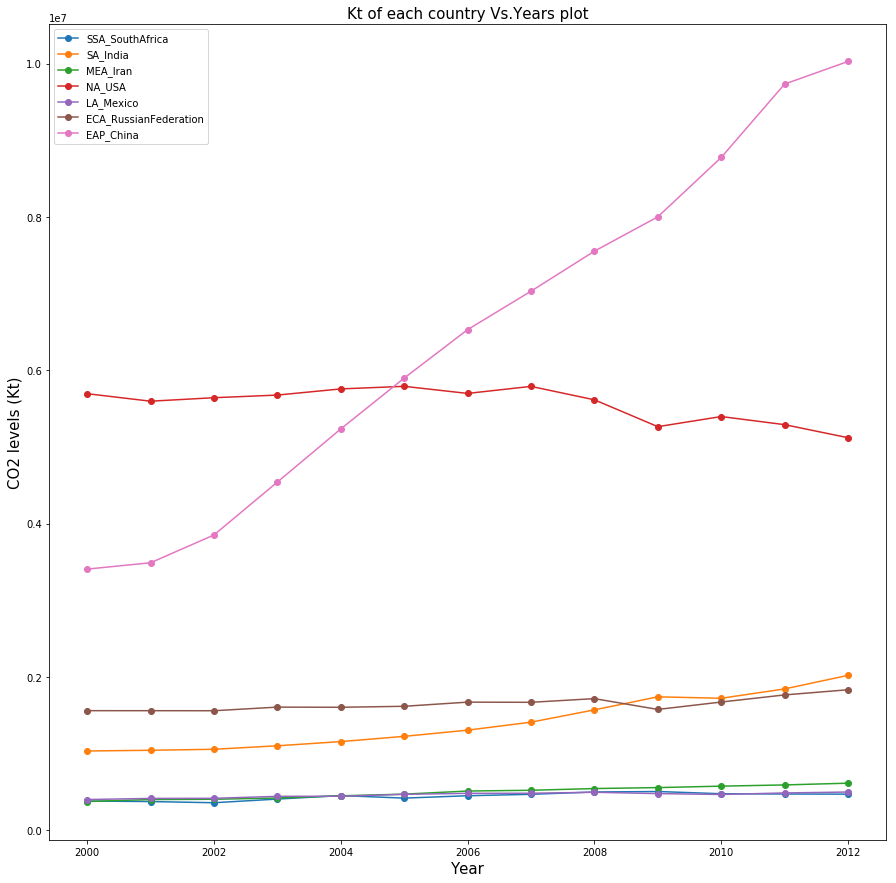

In [211]:
#plotting graph for top countries in each region
years=[ 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
co_SouthAfrica=co3.values[242,4:] #Single country from SSA region
co_India=co3.values[102,4:] #Single country from SA region
co_Iran=co3.values[104,4:] #Single country from MEA region
co_USA=co3.values[232,4:] #Single country from NA region
co_Mexico=co3.values[143,4:] #Single country from LA region
co_RussianFederation=co3.values[188,4:] #Single country from ECA region
co_China=co3.values[36,4:] #Single country from EAP region


fig = plt.figure(figsize=(15,15))                                   
ax = fig.add_subplot(111) 
ax.plot(years, co_SouthAfrica, '-o', label="SSA_SouthAfrica")
ax.plot(years, co_India, '-o', label="SA_India")   
ax.plot(years, co_Iran, '-o', label="MEA_Iran")
ax.plot(years, co_USA, '-o', label="NA_USA")
ax.plot(years, co_Mexico, '-o', label="LA_Mexico")
ax.plot(years, co_RussianFederation, '-o', label="ECA_RussianFederation")
ax.plot(years, co_China, '-o', label="EAP_China")
plt.ylabel('CO2 levels (Kt)',size=15)
plt.xlabel('Year', size=15)
plt.title("Kt of each country Vs.Years plot", size=15)

         
plt.legend()
plt.show()

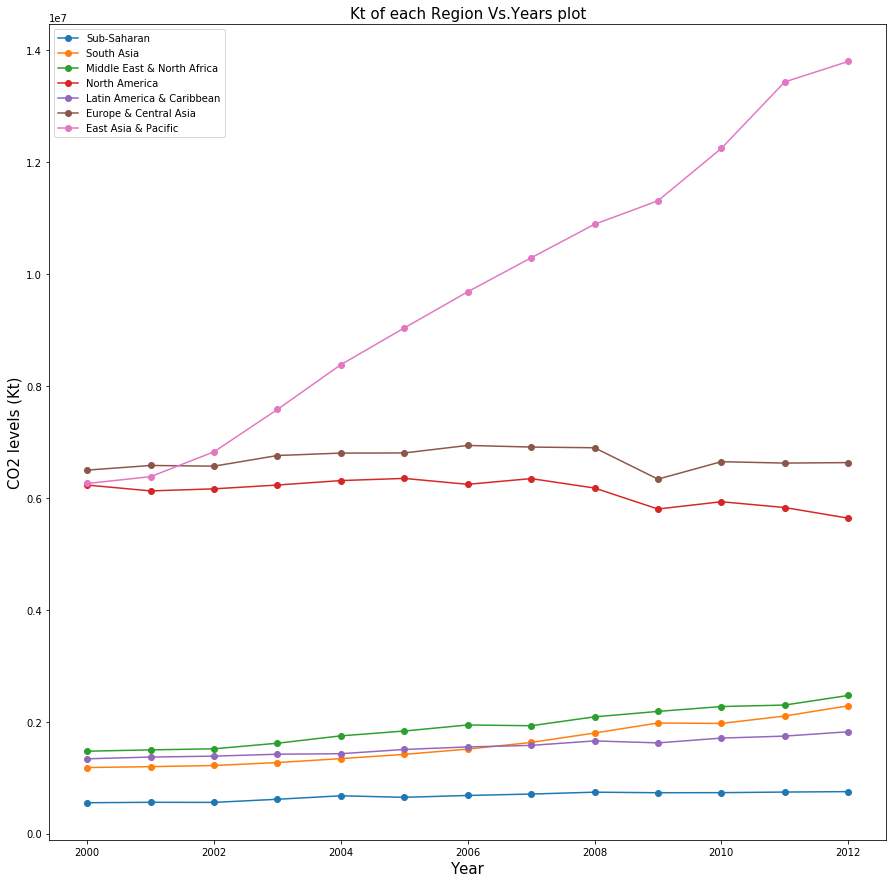

In [212]:
#Plotting graph for all the regions
years=[ 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
co_SSA_g= co3.values[245,4:]
co_SA_g= co3.values[246,4:]
co_MEA_g= co3.values[247,4:]
co_NA_g= co3.values[248,4:]
co_LA_g= co3.values[249,4:]
co_ECA_g= co3.values[250,4:]
co_EAP_g= co3.values[251,4:]                                         ######################################
fig = plt.figure(figsize=(15,15))                                   #######################################
ax = fig.add_subplot(111)                                           #######################################
ax.plot(years, co_SSA_g, '-o', label="Sub-Saharan")                 #######################################
ax.plot(years, co_SA_g, '-o', label="South Asia")
ax.plot(years, co_MEA_g, '-o', label="Middle East & North Africa")
ax.plot(years, co_NA_g, '-o', label="North America")
ax.plot(years, co_LA_g, '-o', label="Latin America & Caribbean")
ax.plot(years, co_ECA_g, '-o', label="Europe & Central Asia")
ax.plot(years, co_EAP_g, '-o', label="East Asia & Pacific")
plt.ylabel('CO2 levels (Kt)',size=15)
plt.xlabel('Year', size=15)
plt.title("Kt of each Region Vs.Years plot", size=15)


plt.legend()

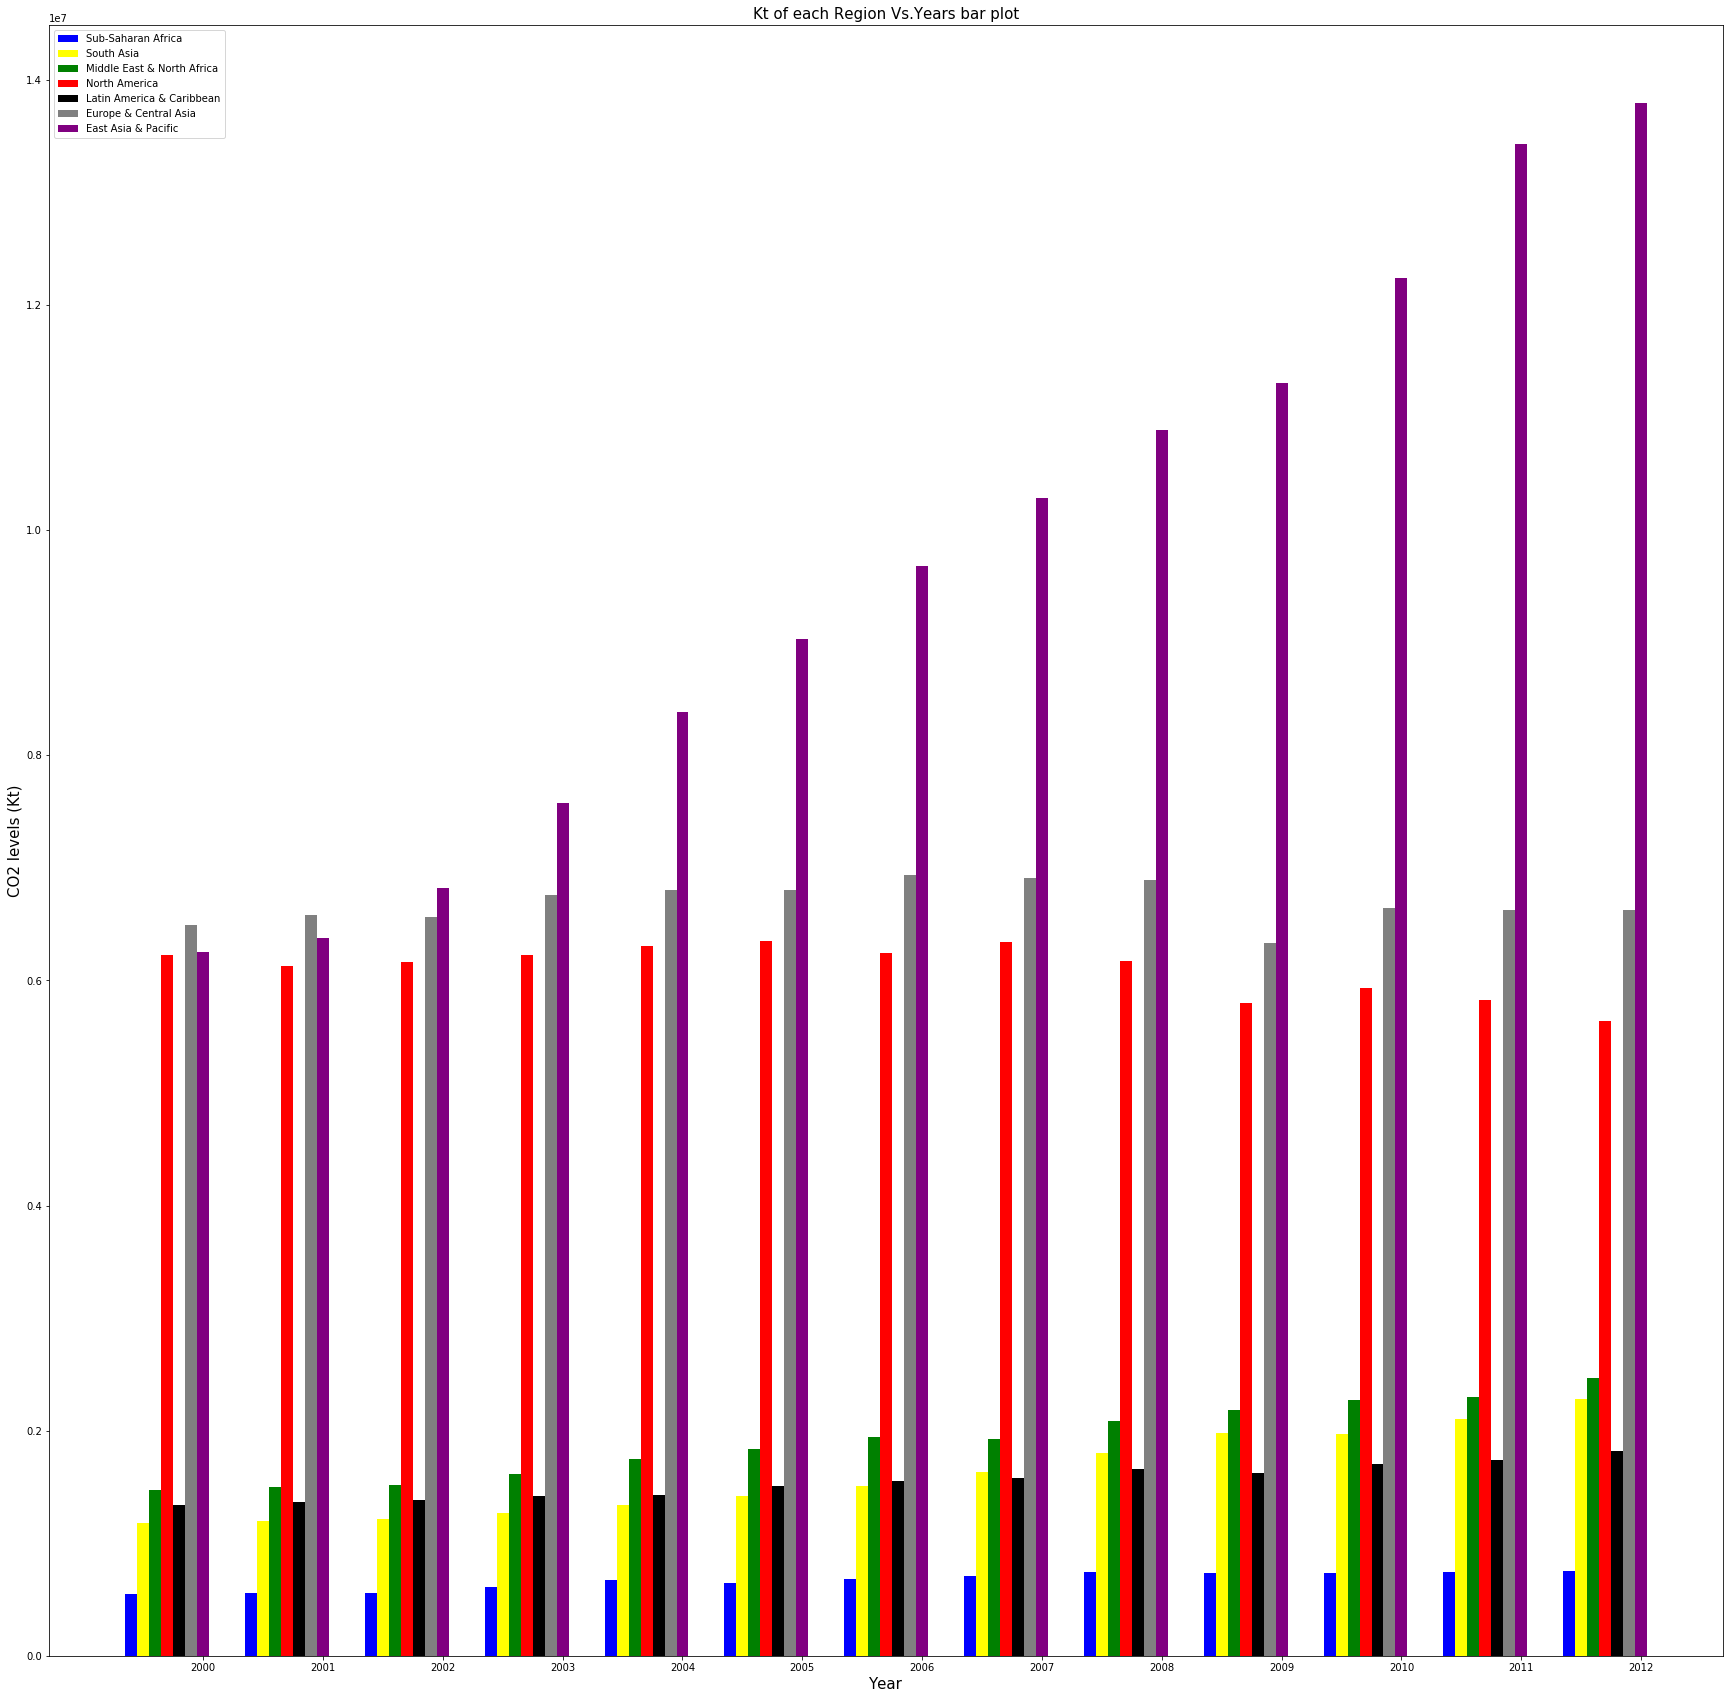

In [213]:
#Plotting bar chart to compare trend of each region against one another
co_SSA_g= co3.values[245,4:].tolist()
co_SA_g= co3.values[246,4:].tolist()
co_MEA_g= co3.values[247,4:].tolist()
co_NA_g= co3.values[248,4:].tolist()
co_LA_g= co3.values[249,4:].tolist()
co_ECA_g= co3.values[250,4:].tolist()
co_EAP_g= co3.values[251,4:].tolist()   
X = np.arange(13)
width = 0.10
fig = plt.figure(figsize=(30,30)) 

ax = fig.subplots()
ax.bar(X, co_SSA_g, width, color='blue', label="Sub-Saharan Africa")
ax.bar(X+width, co_SA_g, width, color='yellow', label="South Asia")
ax.bar(X+2*width, co_MEA_g, width, color='green', label="Middle East & North Africa")
ax.bar(X+3*width, co_NA_g, width, color='red', label="North America")
ax.bar(X+4*width, co_LA_g, width, color='black', label="Latin America & Caribbean")
ax.bar(X+5*width, co_ECA_g, width, color='grey', label="Europe & Central Asia")
ax.bar(X+6*width, co_EAP_g, width, color='purple', label="East Asia & Pacific")
ax.set_xticks(X+6*width)
ax.set_xticklabels(('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012')) 
plt.ylabel('CO2 levels (Kt)',size=15)
plt.xlabel('Year', size=15)
plt.title("Kt of each Region Vs.Years bar plot", size=15)
plt.legend()
plt.show()




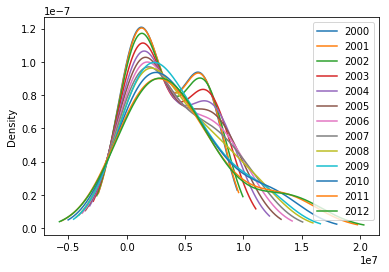

In [214]:
#Density plot for all regions year wise
co3_r_d= co3.iloc[245:,4:]
co3_r_d.plot.density()              
plt.show()




In [215]:
#selecting only the rows with the new regions
co222= co3.iloc[245:,0:]
co222

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
245,NEW Sub-Saharan Africa,AGOBDIBENBFABWACAFCMRCODCOGCOMCPVERIETHGABGHAG...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"552,308.87","560,027.91","558,249.41","614,402.18","676,462.49","648,908.65","682,278.35","707,356.97","740,917.35","731,155.80","732,431.91","743,205.56","750,829.25"
246,NEW South Asia,AFGBGDBTNINDLKAMDVNPLPAK,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,181,100.36","1,197,268.17","1,217,814.37","1,270,164.46","1,340,519.52","1,416,188.07","1,510,675.66","1,629,299.44","1,798,062.11","1,976,769.69","1,969,230.34","2,101,777.72","2,284,078.96"
247,NEW Middle east & North Africa,AREBHRDJIDZAEGYIRNIRQISRJORKWTLBNLBYMARMLTOMNP...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,473,033.90","1,496,924.40","1,515,868.13","1,615,889.22","1,747,453.84","1,833,500.00","1,941,947.86","1,928,295.62","2,086,820.03","2,184,057.87","2,271,079.44","2,297,742.20","2,468,881.09"
248,NEW North America,BMUCANUSA,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KT,"6,228,582.85","6,124,249.37","6,161,201.72","6,229,363.92","6,308,857.15","6,347,727.35","6,241,758.38","6,344,115.35","6,175,789.05","5,800,746.63","5,930,811.45","5,827,237.03","5,637,370.78"
249,NEW Latin America & Caribbean,ABWARGATGBHSBLZBOLBRABRBCHLCOLCRICUBCYMDMADOME...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"1,337,211.89","1,368,608.74","1,385,047.90","1,418,963.99","1,428,417.51","1,504,353.75","1,549,545.86","1,577,132.70","1,656,948.62","1,621,657.41","1,707,333.20","1,742,866.43","1,820,221.79"
250,NEW Europe & Central Asia,ALBANDARMAUTAZEBELBGRBIHBLRCHECYPCZEDEUDNKESPE...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"6,495,863.15","6,578,880.36","6,566,507.90","6,756,638.18","6,800,015.13","6,802,226.33","6,936,940.91","6,907,883.60","6,895,342.46","6,334,445.47","6,646,331.16","6,621,630.25","6,629,928.67"
251,NEW East Asia & Pacific,AUSBRNCHNFJIFSMHKGIDNJPNKHMKIRKORLAOMACMHLMMRM...,CO2 emissions (kt)CO2 emissions (kt)CO2 emissi...,EN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.ATM.CO2E.KTEN.A...,"6,256,723.41","6,379,102.20","6,823,656.28","7,580,488.41","8,380,286.77","9,036,001.38","9,681,855.42","10,289,407.65","10,888,610.12","11,308,213.93","12,244,307.35","13,432,298.01","13,797,828.23"


In [216]:
#Changinng the index names
co222.index=['NEW Sub-Saharan Africa ','NEW South Asia','NEW Middle east & North Africa','NEW North America','NEW Latin America & Caribbean','NEW Europe & Central Asia','NEW East Asia & Pacific']

In [217]:
#Interpolating row to columns and dropping unwanted columns
co32111= co222.T
co32111.drop(["Country Name", "Country Code", "Indicator Name", "Indicator Code"], inplace= True)

In [218]:
##### Refer this final modified dataframe to apply sklearn models onto it.*****####
co32111 

,NEW Sub-Saharan Africa,NEW South Asia,NEW Middle east & North Africa,NEW North America,NEW Latin America & Caribbean,NEW Europe & Central Asia,NEW East Asia & Pacific
2000,"552,308.87","1,181,100.36","1,473,033.90","6,228,582.85","1,337,211.89","6,495,863.15","6,256,723.41"
2001,"560,027.91","1,197,268.17","1,496,924.40","6,124,249.37","1,368,608.74","6,578,880.36","6,379,102.20"
2002,"558,249.41","1,217,814.37","1,515,868.13","6,161,201.72","1,385,047.90","6,566,507.90","6,823,656.28"
2003,"614,402.18","1,270,164.46","1,615,889.22","6,229,363.92","1,418,963.99","6,756,638.18","7,580,488.41"
2004,"676,462.49","1,340,519.52","1,747,453.84","6,308,857.15","1,428,417.51","6,800,015.13","8,380,286.77"
2005,"648,908.65","1,416,188.07","1,833,500.00","6,347,727.35","1,504,353.75","6,802,226.33","9,036,001.38"
2006,"682,278.35","1,510,675.66","1,941,947.86","6,241,758.38","1,549,545.86","6,936,940.91","9,681,855.42"
2007,"707,356.97","1,629,299.44","1,928,295.62","6,344,115.35","1,577,132.70","6,907,883.60","10,289,407.65"
2008,"740,917.35","1,798,062.11","2,086,820.03","6,175,789.05","1,656,948.62","6,895,342.46","10,888,610.12"
2009,"731,155.80","1,976,769.69","2,184,057.87","5,800,746.63","1,621,657.41","6,334,445.47","11,308,213.93"


In [219]:
#Insert new column called Year
co32111.insert(0, 'Year','NaN',)


In [220]:
#Entering the years manually
co32111.iloc[0,0]="2000"
co32111.iloc[1,0]="2001"
co32111.iloc[2,0]="2002"
co32111.iloc[3,0]="2003"
co32111.iloc[4,0]="2004"
co32111.iloc[5,0]="2005"
co32111.iloc[6,0]="2006"
co32111.iloc[7,0]="2007"
co32111.iloc[8,0]="2008"
co32111.iloc[9,0]="2009"
co32111.iloc[10,0]="2010"
co32111.iloc[11,0]="2011"
co32111.iloc[12,0]="2012"

co32111

,Year,NEW Sub-Saharan Africa,NEW South Asia,NEW Middle east & North Africa,NEW North America,NEW Latin America & Caribbean,NEW Europe & Central Asia,NEW East Asia & Pacific
2000,2000,"552,308.87","1,181,100.36","1,473,033.90","6,228,582.85","1,337,211.89","6,495,863.15","6,256,723.41"
2001,2001,"560,027.91","1,197,268.17","1,496,924.40","6,124,249.37","1,368,608.74","6,578,880.36","6,379,102.20"
2002,2002,"558,249.41","1,217,814.37","1,515,868.13","6,161,201.72","1,385,047.90","6,566,507.90","6,823,656.28"
2003,2003,"614,402.18","1,270,164.46","1,615,889.22","6,229,363.92","1,418,963.99","6,756,638.18","7,580,488.41"
2004,2004,"676,462.49","1,340,519.52","1,747,453.84","6,308,857.15","1,428,417.51","6,800,015.13","8,380,286.77"
2005,2005,"648,908.65","1,416,188.07","1,833,500.00","6,347,727.35","1,504,353.75","6,802,226.33","9,036,001.38"
2006,2006,"682,278.35","1,510,675.66","1,941,947.86","6,241,758.38","1,549,545.86","6,936,940.91","9,681,855.42"
2007,2007,"707,356.97","1,629,299.44","1,928,295.62","6,344,115.35","1,577,132.70","6,907,883.60","10,289,407.65"
2008,2008,"740,917.35","1,798,062.11","2,086,820.03","6,175,789.05","1,656,948.62","6,895,342.46","10,888,610.12"
2009,2009,"731,155.80","1,976,769.69","2,184,057.87","5,800,746.63","1,621,657.41","6,334,445.47","11,308,213.93"


In [221]:
co32111.describe()

,Year,NEW Sub-Saharan Africa,NEW South Asia,NEW Middle east & North Africa,NEW North America,NEW Latin America & Caribbean,NEW Europe & Central Asia,NEW East Asia & Pacific
count,13,13.00,13.00,13.00,13.00,13.00,13.00,13.00
unique,13,13.00,13.00,13.00,13.00,13.00,13.00,13.00
top,2010,"707,356.97","1,416,188.07","1,833,500.00","5,800,746.63","1,820,221.79","6,621,630.25","10,289,407.65"
freq,1,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [222]:
df3= co32111
df3

,Year,NEW Sub-Saharan Africa,NEW South Asia,NEW Middle east & North Africa,NEW North America,NEW Latin America & Caribbean,NEW Europe & Central Asia,NEW East Asia & Pacific
2000,2000,"552,308.87","1,181,100.36","1,473,033.90","6,228,582.85","1,337,211.89","6,495,863.15","6,256,723.41"
2001,2001,"560,027.91","1,197,268.17","1,496,924.40","6,124,249.37","1,368,608.74","6,578,880.36","6,379,102.20"
2002,2002,"558,249.41","1,217,814.37","1,515,868.13","6,161,201.72","1,385,047.90","6,566,507.90","6,823,656.28"
2003,2003,"614,402.18","1,270,164.46","1,615,889.22","6,229,363.92","1,418,963.99","6,756,638.18","7,580,488.41"
2004,2004,"676,462.49","1,340,519.52","1,747,453.84","6,308,857.15","1,428,417.51","6,800,015.13","8,380,286.77"
2005,2005,"648,908.65","1,416,188.07","1,833,500.00","6,347,727.35","1,504,353.75","6,802,226.33","9,036,001.38"
2006,2006,"682,278.35","1,510,675.66","1,941,947.86","6,241,758.38","1,549,545.86","6,936,940.91","9,681,855.42"
2007,2007,"707,356.97","1,629,299.44","1,928,295.62","6,344,115.35","1,577,132.70","6,907,883.60","10,289,407.65"
2008,2008,"740,917.35","1,798,062.11","2,086,820.03","6,175,789.05","1,656,948.62","6,895,342.46","10,888,610.12"
2009,2009,"731,155.80","1,976,769.69","2,184,057.87","5,800,746.63","1,621,657.41","6,334,445.47","11,308,213.93"


<Figure size 3600x3600 with 0 Axes>

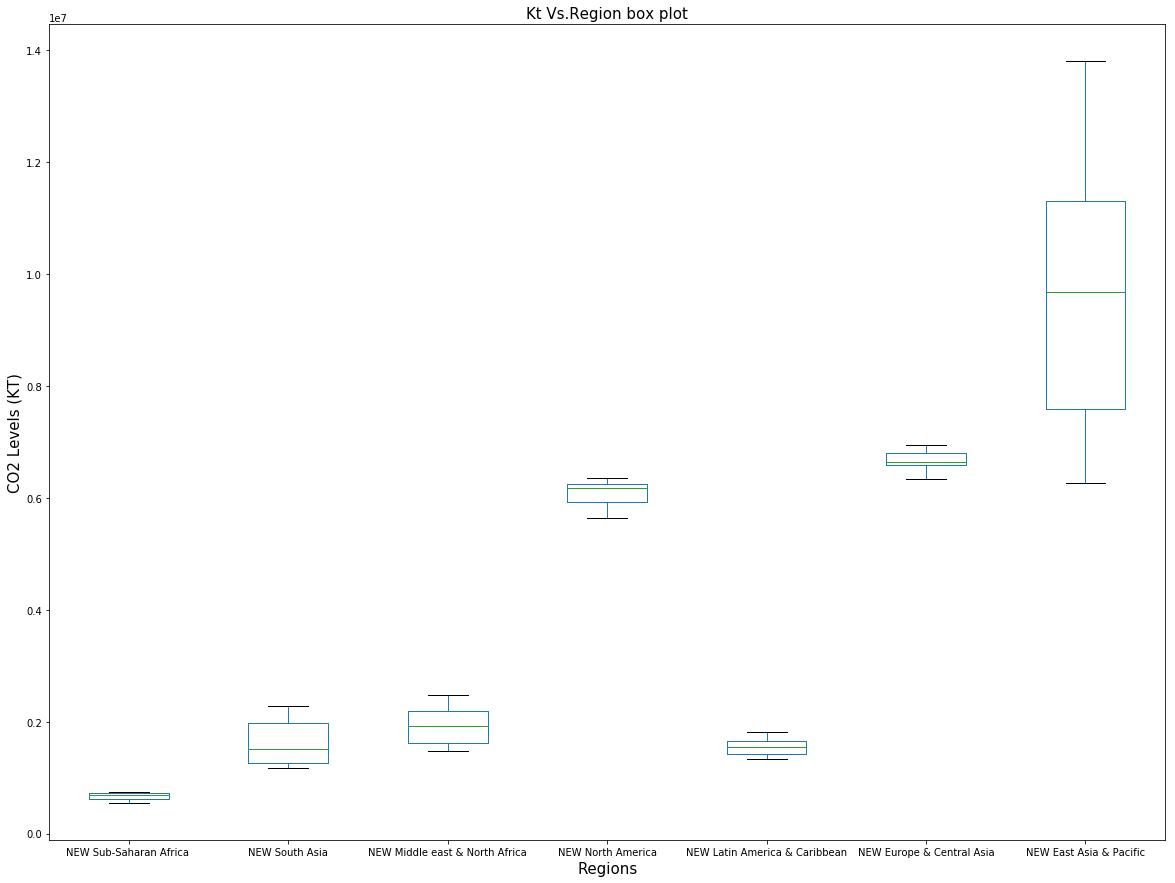

In [223]:
fig = plt.figure(figsize=(50,50)) 
df3.plot(kind='box', layout=(4,4), figsize=(20,15))
plt.xlabel('Regions',size=15)
plt.ylabel('CO2 Levels (KT)', size=15)
plt.title("Kt Vs.Region box plot", size=15)
plt.show()



In [224]:
######################***************** SUPERVISED LEARNING *******************######################

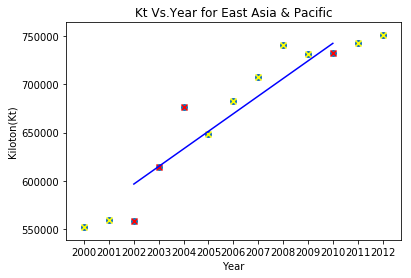

The Accuracy of Linear Regression Model is: 79.77725348369067 %


In [225]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from  sklearn.metrics  import r2_score 

regr = linear_model.LinearRegression() #Calling linear regression
X = df3.iloc[:,0].values #Taking the years
Y = df3.iloc[:,1].values #Taking the Region wise values values (MUST CHANGE VALUES FROM 1 TO 7 TO CHANGE REGIONS) 
X=X.reshape(len(X),1) #Reshaped to contain single item
Y=Y.reshape(len(Y),1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
plt.scatter(X.ravel().tolist(),Y.ravel().tolist())
plt.scatter(X_train.ravel().tolist(),Y_train.ravel().tolist(), color='yellow',marker = 'x')
plt.scatter(X_test.ravel().tolist(),Y_test.ravel().tolist(), color='red',marker = 'x')
plt.plot(X_test.ravel().tolist(),Y_pred.ravel().tolist(), color='blue')
plt.ylabel('Kiloton(Kt)')
plt.xlabel('Year')
plt.title("Kt Vs.Year for East Asia & Pacific")
plt.show()
print("The Accuracy of Linear Regression Model is:", r2_score(Y_test,Y_pred)*100, "%")

In [226]:
######################***************** UN-SUPERVISED LEARNING *******************######################

In [227]:
df_vv=df3.values[0:,0] #The year column taken for the Target labels
df23=df3.values[0:,1] # Taking the regions individually
df23=df23.reshape(len(df23),1)

In [228]:
#### Agglomerative Clustering - Calinski Harabaz Score ####
print('NEW Sub-Saharan Africa')
for k in range(2, 13):
    model = cluster.AgglomerativeClustering(n_clusters=k).fit(df23) 
    labels = model.labels_
    print(k, metrics.calinski_harabaz_score(df23, labels))



NEW Sub-Saharan Africa
2 28.510948756553883
3 58.82566973111938
4 139.82483379700147
5 161.08773564186404
6 303.1813942833145
7 652.1590417028599
8 916.7639703393678
9 1552.6141579768012
10 4527.696860637721
11 5685.401939435361
12 7603.985127271529


In [229]:
print('Agglomerative Clustering')
print('Completeness Score:') 
print(metrics.completeness_score(df_vv, model.labels_)) 
print('Homogeneity Score:')
print(metrics.homogeneity_score(df_vv, model.labels_))

Agglomerative Clustering
Completeness Score:
1.0
Homogeneity Score:
0.9584248993188739


In [230]:
#### K-Means Clustering - Calinski Harabaz Score ####
from sklearn.cluster import KMeans
print('NEW  Sub-Saharan Africa')
for k in range(2, 13):
    km = KMeans(n_clusters=k)
    km.fit(df23)

    print(k, metrics.calinski_harabaz_score(df23, km.labels_))


NEW  Sub-Saharan Africa
2 47.69930283833385
3 78.93147266404401
4 139.82483379700147
5 161.08773564186401
6 303.1813942833145
7 652.1590417028599
8 916.7639703393678
9 1552.6141579768012
10 4527.696860637722
11 5685.401939435361
12 7603.985127271528


In [231]:
print('K-MEANS')
print('Completeness Score:') 
print(metrics.completeness_score(df_vv, km.labels_))
print('Homogeneity Score:')
print(metrics.homogeneity_score(df_vv, km.labels_))

K-MEANS
Completeness Score:
1.0
Homogeneity Score:
0.9584248993188739


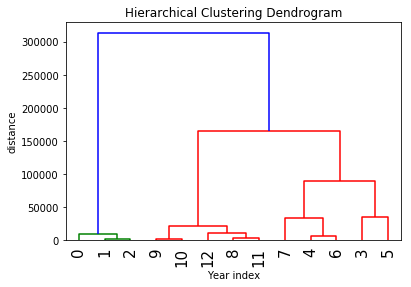

In [232]:
#Doing Dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage  
model = linkage(df23, 'ward')
plt.figure()
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Year index')
plt.ylabel('distance')
dendrogram(model, leaf_rotation=90., leaf_font_size=15.,)
plt.show()